Let's try to generate some poisson data.

In [2]:
set.seed(2018)
x = rgamma(50,3,2)
z = rgamma(50,1,2)
Y = rpois(50, lambda=exp(x+z))

Now lets try to fit some data, first with with the correct model and then with one which misses out the latent variables.

In [3]:
mod1 <- glm(Y ~ x+z, family=poisson)
mod2 <- glm(Y ~ x, family=poisson)

Let's have a look at the confidence intervals of the estimated parameters.

In [5]:
summary (mod1)
summary (mod2)


Call:
glm(formula = Y ~ x + z, family = poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3898  -0.8733  -0.0021   0.4891   3.2090  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.02583    0.13466  -0.192    0.848    
x            0.99835    0.03837  26.022   <2e-16 ***
z            1.12716    0.08792  12.820   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 745.616  on 49  degrees of freedom
Residual deviance:  64.341  on 47  degrees of freedom
AIC: 255.01

Number of Fisher Scoring iterations: 4



Call:
glm(formula = Y ~ x, family = poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2141  -1.5792  -1.0401   0.9351   5.4138  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.98221    0.08765   11.21   <2e-16 ***
x            0.80559    0.03202   25.16   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 745.62  on 49  degrees of freedom
Residual deviance: 213.57  on 48  degrees of freedom
AIC: 402.24

Number of Fisher Scoring iterations: 5


In [27]:
coef1 <- summary(mod1)$coefficients
coef2 <- summary(mod2)$coefficients
coef1[,1]
coef1[,1] + 1.96*cbind(-coef1[,2], coef1[,2])
coef2[,1]
coef2[,1] + 1.96*cbind(-coef2[,2], coef2[,2])


(Intercept)           x           z 
-0.02582504  0.99835024  1.12716080

(Intercept),-0.2897571,0.238107
x,0.9231548,1.073546
z,0.9548362,1.299485


(Intercept)           x 
  0.9822112   0.8055907

(Intercept),0.8104110,1.1540114
x,0.7428289,0.8683525


Note that in the second case, the confidence intervals do not cover the true value. This is not unexpected, since we have missed valuable information.

The outcome will vary much more than expected -- there is overdispersion. Let's try to fit a quasipoisson model instead.

The quasipoisson model has larger errors, but the same parameter estimates.

The ratio is exactly the square root of the dispersion parameter.

In [26]:
mod3 <- glm(Y ~ x, family=quasipoisson)
summary(mod3)


Call:
glm(formula = Y ~ x, family = quasipoisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2141  -1.5792  -1.0401   0.9351   5.4138  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.98221    0.19784   4.965 9.09e-06 ***
x            0.80559    0.07227  11.146 6.44e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasipoisson family taken to be 5.094278)

    Null deviance: 745.62  on 49  degrees of freedom
Residual deviance: 213.57  on 48  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 5


Let's try to generate some data and have a look at the coverage of the parameter estimates (we generate data, check if it is in the coverage and then work out the proportion which is inside)

In [36]:
N=1000
cover<-rep(1,N)
cover2<-rep(1,N)
for (i in 1:N) {
xs <- log(rgamma(n, 3, 2))
zs <- log(rgamma(n, 1, 2))
Ys <- rpois(n, lambda=exp(zs+xs))
mods <- glm(Ys ~ xs, family=quasipoisson) # fit the quasi-Poisson model
tmp <- summary(mods)
betahat <- tmp$coefficients[2,1]
se <- tmp$coefficients[2,2]
phi <- tmp$dispersion
CI <- betahat + c(-1,1)*1.96*se/sqrt(phi)
CI2 <- betahat + c(-1,1)*1.96*se
cover[i] <- (CI[1] < 1) && (CI[2] > 1)
cover2[i] <- (CI2[1] < 1) && (CI2[2] > 1)
}
mean(cover)
mean(cover2)


[1] 0.854

[1] 0.945

As $N\rightarrow \infty$, the coverage of the quasipoisson model converges to 95. However, the coverage of the normal poisson mosel are far too small.

R uses a t-test instead of a z-test in order to perform the hypothesis test because the dispersion parameter is estimated (hence approx Chi squared).

Both tests are valid as $n$ tends to infinity, however.

Let's have a look at some self harm data in order to assess the effectiveness of therapy.

First, import the data...

In [4]:
filePath <- "http://www.statslab.cam.ac.uk/~tw389/teaching/SLP18/data/"
fileName <- "selfharm.csv"
selfharm <- read.csv(paste0(filePath, fileName), header=T)
head(selfharm)
attach(selfharm)


count,trt,sex,age,centre,bpd
1,0,1,42,0,1
1,0,1,36,0,1
1,0,1,37,0,2
0,1,1,18,0,1
0,1,0,26,0,1
0,1,1,42,0,1


The following objects are masked from selfharm (pos = 3):

    age, bpd, centre, count, sex, trt

The following objects are masked from selfharm (pos = 4):

    age, bpd, centre, count, sex, trt



count
  0   1   2   3   4   5   7   8   9  10  11  15  16  17  20  22  24  41  45 
165  40  19   6   2   4   2   3   2   1   2   1   1   1   1   2   1   1   1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   1.702   1.000  45.000 

[1] 26.68248

trt: 0
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   2.008   1.000  45.000 
------------------------------------------------------------ 
trt: 1
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   1.389   1.000  24.000 

trt: 0
[1] 38.19525
------------------------------------------------------------ 
trt: 1
[1] 14.91156

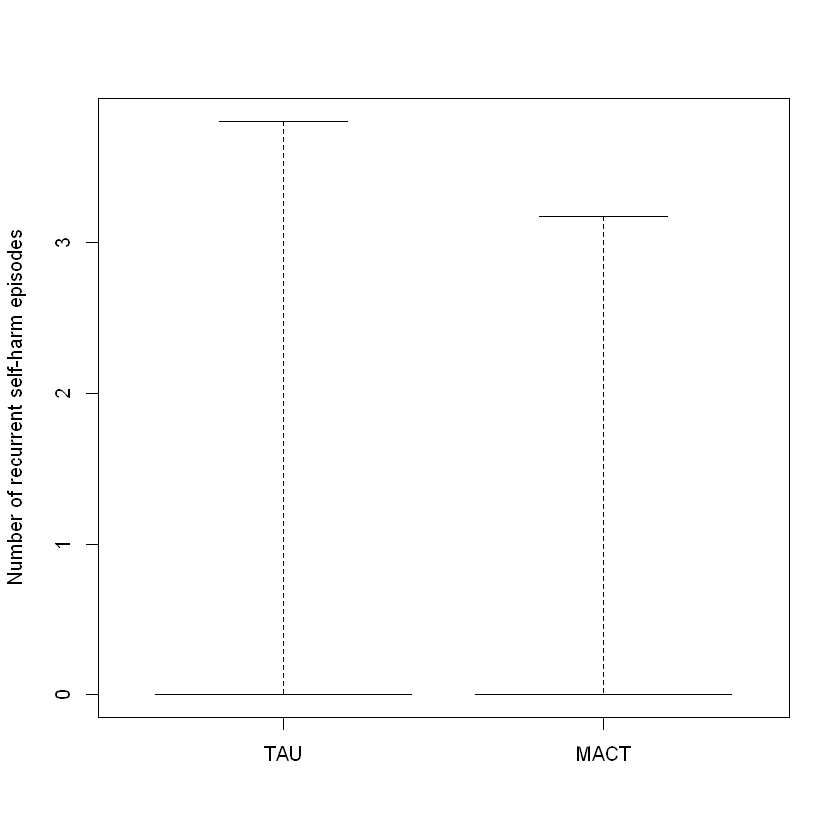

In [5]:
table(count)
summary(count)
var(count)
by(count, trt, summary)
by(count, trt, var)
boxplot(split(log(count),trt),names=c("TAU", "MACT"),
col=2:3, ylab= "Number of recurrent self-harm episodes")

We can see there's some decrease in the number of self harm episodes after MACT instead of treatment as usual (TAU).

In [8]:
library(MASS)
library(pscl)
library(lmtest)

Warning message:
"package 'lmtest' was built under R version 3.4.4"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



Let's have a look the histograms of the number of episodes overall and after treatment.

There is a huge spike at zero, since a large number of people stop engaging in self harm.

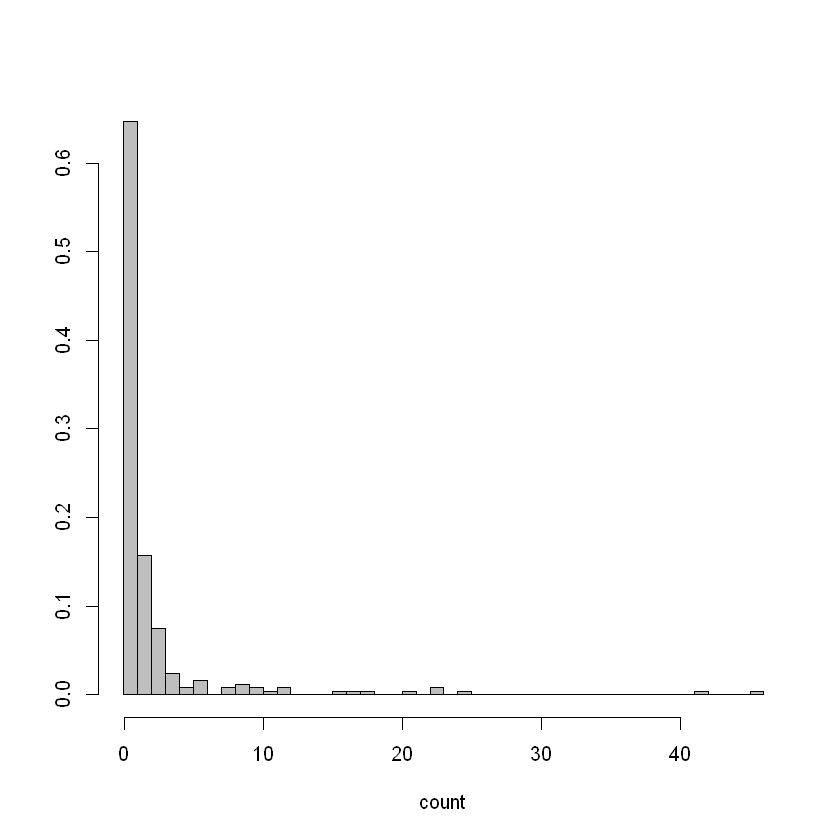

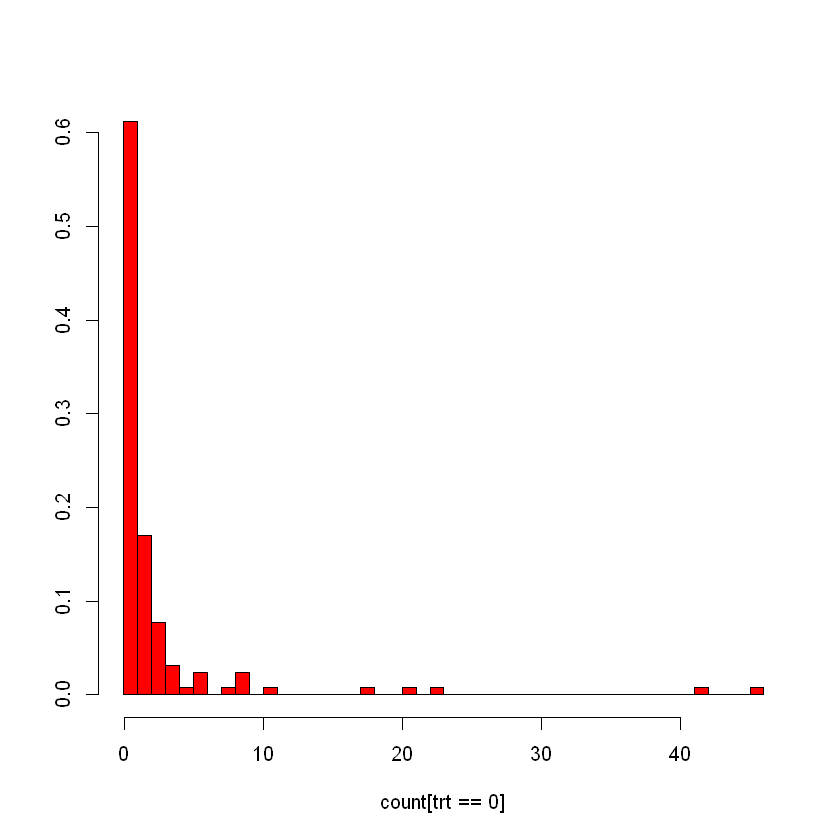

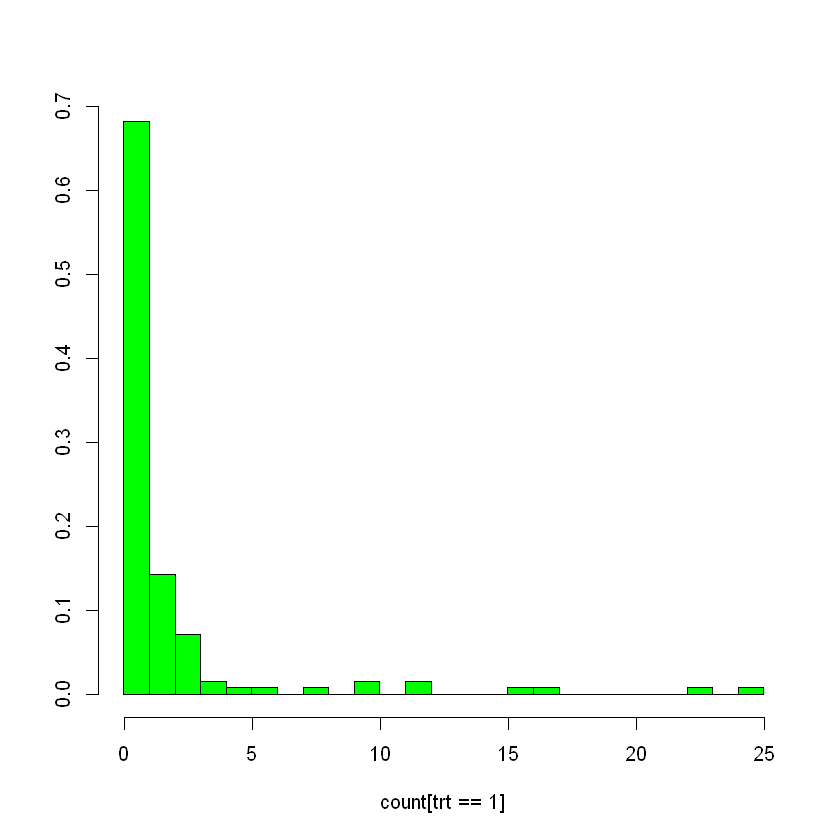

In [9]:
truehist(count,h=1,col="grey")
truehist(count[trt==0],h=1,col="red")
truehist(count[trt==1],h=1,col="green")

Let's try to fit a poisson model first.

In [10]:
centre <- as.factor(centre)
bpd <- as.factor(bpd)
selfharm.pois <- glm(count~trt+age+centre+bpd*sex, family = "poisson")
summary(selfharm.pois)


Call:
glm(formula = count ~ trt + age + centre + bpd * sex, family = "poisson")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2184  -1.9389  -1.2391  -0.1724  11.6703  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.722749   0.215386   7.998 1.26e-15 ***
trt         -0.437138   0.099969  -4.373 1.23e-05 ***
age         -0.044763   0.005003  -8.946  < 2e-16 ***
centre1      0.169112   0.102001   1.658   0.0973 .  
bpd2         0.272884   0.233757   1.167   0.2431    
bpd3        -1.642343   0.401469  -4.091 4.30e-05 ***
sex          0.295732   0.149653   1.976   0.0481 *  
bpd2:sex    -0.466511   0.277923  -1.679   0.0932 .  
bpd3:sex     2.074192   0.424124   4.891 1.01e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 1560.0  on 254  degrees of freedom
Residual deviance: 1368.3  on 246  degrees of freedom
AIC: 1639.4

Numb

The deviance is much too high the for the degrees of freedom, which means the model is rejected.

There is overdispersion, since we expect there to be correlation within an individual (some are more likely to relapse than others).


We calculate the deviance’s Chi-squared statistic below (see definition of Pearson’s residuals
in Example Sheet 1). The p-value is highly significant, so we conclude that there is overdispersion.

In [17]:
chisq <- sum(residuals(selfharm.pois,type="pearson")^2)
chisq
1-pchisq(chisq, selfharm.pois$df.residual)


[1] 2660.956

[1] 0

Here we inflate the errors by a factor of $\sqrt{\hat{\phi}}$. 

If we chose "quasipoisson" family, the estimated values and errors turn out to be the same, but R does a $t$-test instead of a $z$-test on the significance.

In [19]:
phi <- chisq/selfharm.pois$df.residual
summary(selfharm.pois, dispersion=phi)


Call:
glm(formula = count ~ trt + age + centre + bpd * sex, family = "poisson")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2184  -1.9389  -1.2391  -0.1724  11.6703  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  1.72275    0.70838   2.432  0.01502 * 
trt         -0.43714    0.32879  -1.330  0.18367   
age         -0.04476    0.01646  -2.720  0.00653 **
centre1      0.16911    0.33547   0.504  0.61419   
bpd2         0.27288    0.76880   0.355  0.72263   
bpd3        -1.64234    1.32039  -1.244  0.21356   
sex          0.29573    0.49219   0.601  0.54794   
bpd2:sex    -0.46651    0.91406  -0.510  0.60979   
bpd3:sex     2.07419    1.39490   1.487  0.13702   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 10.8169)

    Null deviance: 1560.0  on 254  degrees of freedom
Residual deviance: 1368.3  on 246  degrees of freedom
AIC: 1639.4

Number of Fisher S

In [21]:
summary(glm(count~trt+age+centre+bpd*sex, family = "quasipoisson"))



Call:
glm(formula = count ~ trt + age + centre + bpd * sex, family = "quasipoisson")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2184  -1.9389  -1.2391  -0.1724  11.6703  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  1.72275    0.70838   2.432  0.01573 * 
trt         -0.43714    0.32879  -1.330  0.18490   
age         -0.04476    0.01646  -2.720  0.00699 **
centre1      0.16911    0.33547   0.504  0.61464   
bpd2         0.27288    0.76880   0.355  0.72293   
bpd3        -1.64234    1.32039  -1.244  0.21475   
sex          0.29573    0.49219   0.601  0.54850   
bpd2:sex    -0.46651    0.91406  -0.510  0.61025   
bpd3:sex     2.07419    1.39490   1.487  0.13830   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasipoisson family taken to be 10.8169)

    Null deviance: 1560.0  on 254  degrees of freedom
Residual deviance: 1368.3  on 246  degrees of freedom
AIC: NA

Number of Fi

Now let's try a Negative Binmoial model, again to account for overdispersion.

We assume that there is unaccounted heterogeneity, so we use the negative binomial.

In [25]:
selfharm.nb <-glm.nb(count~trt+age+centre+bpd*sex)
summary(selfharm.nb)



Call:
glm.nb(formula = count ~ trt + age + centre + bpd * sex, init.theta = 0.2094908739, 
    link = log)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.16075  -0.98580  -0.79791  -0.09116   2.28821  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  1.79057    0.61670   2.903  0.00369 **
trt         -0.40996    0.30610  -1.339  0.18047   
age         -0.04359    0.01328  -3.283  0.00103 **
centre1     -0.10721    0.31840  -0.337  0.73633   
bpd2         0.40679    0.74869   0.543  0.58690   
bpd3        -1.52077    0.70345  -2.162  0.03063 * 
sex          0.26700    0.40919   0.653  0.51408   
bpd2:sex    -0.10217    0.88504  -0.115  0.90810   
bpd3:sex     1.85958    0.85756   2.168  0.03012 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(0.2095) family taken to be 1)

    Null deviance: 205.06  on 254  degrees of freedom
Residual deviance: 182.28  on 246  d

This is a little depressing, since non of the treatments seem to work significatnly in this model.

The over dispersion parameter is $\tau = 1/0.2095 =  4.77$, which is significantly larger than 0. (Note that the model is poisson if the parameter is 0 -- This is similar to taking the limit in a binomial distribution to get a poisson model)

We can check the number of zero counts with this command:

In [37]:
sum(dnbinom(0,mu=fitted(selfharm.nb),size=selfharm.nb$theta))


[1] 168.1302

We run the overdisperision test. The chi squared statistic is huge, so we reject the null and accept the NegBinom model.

In [39]:
odTest(selfharm.nb)

Likelihood ratio test of H0: Poisson, as restricted NB model:
n.b., the distribution of the test-statistic under H0 is non-standard
e.g., see help(odTest) for details/references

Critical value of test statistic at the alpha= 0.05 level: 2.7055 
Chi-Square Test Statistic =  907.6169 p-value = < 2.2e-16 


Finally, we try to account for the zeros directly using a ZIP model. Here, zip1 is a model where we assume the probability of a zero is the same for all Y. In the second case we assume it is logistic with respect to the parameters.

We can modify after the bar in order to tweak the covariantes we use for the probability. e.g.


zeroinfl(count~trt+age+centre+bpd*sex | trt+age, dist="poisson") 

We compare the two using a likelihood ratio test.

In [46]:
selfharm.zip1 <- zeroinfl(count~trt+age+centre+bpd*sex | 1, dist="poisson")
selfharm.zip2 <- zeroinfl(count~trt+age+centre+bpd*sex, dist="poisson")

In [48]:
lrtest(selfharm.zip1,selfharm.zip2)

#Df,LogLik,Df,Chisq,Pr(>Chisq)
10,-519.9369,NA,NA,NA
18,-512.3244,8,15.22488,0.05491742


The p-value is larger than 0.05, so we don't reject the null of intercept only. Let's try again with the negative binomial models

In [50]:
selfharm.zinb1 <- zeroinfl(count~trt+age+centre+bpd*sex | 1, dist="negbin")
selfharm.zinb2 <- zeroinfl(count~trt+age+centre+bpd*sex, dist="negbin")

In [52]:
lrtest(selfharm.zip1,selfharm.zip2)

#Df,LogLik,Df,Chisq,Pr(>Chisq)
10,-519.9369,NA,NA,NA
18,-512.3244,8,15.22488,0.05491742


Again, we don't reject the null.

Now we compare all the models using AIC and BIC.

With both, we accept the negative binomial model.

In [56]:
models <- list(selfharm.pois, selfharm.nb, selfharm.zip1, selfharm.zip2,
selfharm.zinb1, selfharm.zinb2)
dim_models <- c(9, 10, 10, 18, 11, 19) # how are the dimensions computed? (These are the number of parameters)
AICs <- -2*sapply(models, logLik) + 2*dim_models
# equivalently, we can use sapply(models, AIC) to compute AIC
BICs <- -2*sapply(models, logLik) + log(length(count))*dim_models

AICs
BICs

models[[which.min(AICs)]] 

[1] 1639.3806  733.7638 1059.8737 1060.6488  735.7638  738.1709

[1] 1671.2520  769.1764 1095.2863 1124.3916  774.7177  805.4549


Call:  glm.nb(formula = count ~ trt + age + centre + bpd * sex, init.theta = 0.2094908739, 
    link = log)

Coefficients:
(Intercept)          trt          age      centre1         bpd2         bpd3  
    1.79057     -0.40996     -0.04359     -0.10721      0.40679     -1.52077  
        sex     bpd2:sex     bpd3:sex  
    0.26700     -0.10217      1.85958  

Degrees of Freedom: 254 Total (i.e. Null);  246 Residual
Null Deviance:	    205.1 
Residual Deviance: 182.3 	AIC: 733.8